Эта программа предназначена для тех, кто занимается фитнесом и хочет отслеживать свой прогресс в выполнении упражнений. Она позволяет выбрать упражнения, количество кругов и повторений, создает таблицу с результатами, строит график и диаграмму выполнения упражнений, сохраняет таблицу результатов в файл csv, загружает ее из файла csv, добавляет новые упражнения в список доступных упражнений и удаляет упражнения из списка доступных упражнений.

Таким образом, программа помогает отслеживать свой прогресс в выполнении упражнений, понимать, какие упражнения работают лучше, а также добавлять и удалять упражнения в список доступных упражнений в зависимости от потребностей.

Enter the day of the week: понедельник
Enter the number of rounds: 5
Enter the exercise for round 1 (Push-ups, Pull-ups, Dips, Plank, Squats): Push-ups
Enter the number of reps for Push-ups: 8
Enter the exercise for round 2 (Push-ups, Pull-ups, Dips, Plank, Squats): Pull-ups
Enter the number of reps for Pull-ups: 8
Enter the exercise for round 3 (Push-ups, Pull-ups, Dips, Plank, Squats): Dips
Enter the number of reps for Dips: 8
Enter the exercise for round 4 (Push-ups, Pull-ups, Dips, Plank, Squats): Plank
Enter the number of reps for Plank: 8
Enter the exercise for round 5 (Push-ups, Pull-ups, Dips, Plank, Squats): Squats
Enter the number of reps for Squats: 8
           Day  Round  Exercise  Reps
0  понедельник      1  Push-ups     8
1  понедельник      1  Pull-ups     8
2  понедельник      1      Dips     8
3  понедельник      1     Plank     8
4  понедельник      1    Squats     8


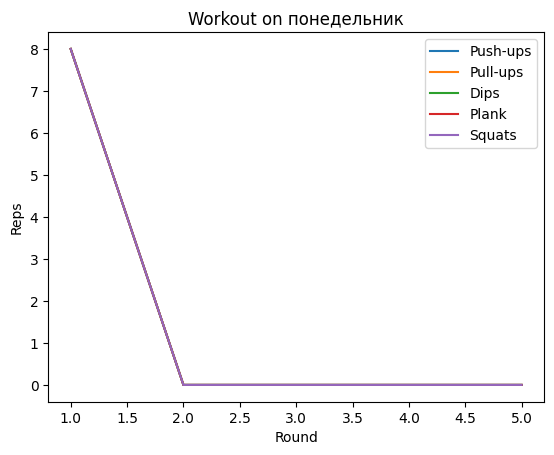

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Список доступных упражнений
available_exercises = ['Push-ups', 'Pull-ups', 'Dips', 'Plank', 'Squats']

# Ввод дня недели, количества кругов и упражнений
day = input("Enter the day of the week: ")
rounds = int(input("Enter the number of rounds: "))
exercises = []
reps = []
for i in range(rounds):
  exercise = input(f"Enter the exercise for round {i+1} ({', '.join(available_exercises)}): ")
  while exercise not in available_exercises:
    print("Invalid exercise. Please choose from the available exercises.")
    exercise = input(f"Enter the exercise for round {i+1} ({', '.join(available_exercises)}): ")
  rep = int(input(f"Enter the number of reps for {exercise}: "))
  exercises.append(exercise)
  reps.append(rep)

# Создание таблицы с результатами
df = pd.DataFrame({'Exercise': exercises, 'Reps': reps})
df['Round'] = df.index // len(available_exercises) + 1
df['Day'] = day
df = df[['Day', 'Round', 'Exercise', 'Reps']]
print(df)

# Построение графика выполнения упражнений
fig, ax = plt.subplots()
for exercise in available_exercises:
  reps = [df.loc[(df['Exercise'] == exercise) & (df['Round'] == r), 'Reps'].sum() for r in range(1, rounds+1)]
  ax.plot(range(1, rounds+1), reps, label=exercise)
ax.set_xlabel('Round')
ax.set_ylabel('Reps')
ax.set_title(f'Workout on {day}')
ax.legend()
plt.show()

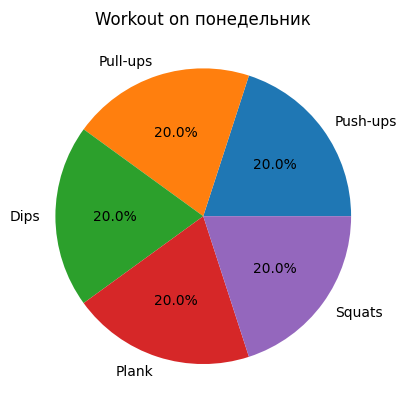

In [20]:
# Построение диаграммы выполнения упражнений
fig, ax = plt.subplots()
ax.pie(df.groupby('Exercise')['Reps'].sum(), labels=available_exercises, autopct='%1.1f%%')
ax.set_title(f'Workout on {day}')
plt.show()

In [25]:
import csv

# Сохранение таблицы результатов в файл csv
with open('workout_results.csv', 'a', newline='') as file:
  writer = csv.writer(file)
  writer.writerows(df.values)

In [29]:
# Загрузка таблицы результатов из файла csv
df = pd.read_csv('workout_results.csv')

# Вывод первых 5 строк таблицы данных
print(df.head())

   понедельник  1  Push-ups  8
0  понедельник  1  Pull-ups  8
1  понедельник  1      Dips  8
2  понедельник  1     Plank  8
3  понедельник  1    Squats  8
4  понедельник  1  Push-ups  8


In [27]:
# Добавление нового упражнения в список доступных упражнений
new_exercise = input("Enter a new exercise: ")
available_exercises.append(new_exercise)
with open('available_exercises.csv', 'a', newline='') as file:
  writer = csv.writer(file)
  writer.writerow([new_exercise])

Enter a new exercise: lunges


In [28]:
# Удаление упражнения из списка доступных упражнений
exercise_to_delete = input("Enter the exercise to delete: ")
if exercise_to_delete in available_exercises:
  available_exercises.remove(exercise_to_delete)
  with open('available_exercises.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([[exercise] for exercise in available_exercises])
else:
  print("Exercise not found in available exercises.")

Enter the exercise to delete: Squats


В этой программе были использованы следующие библиотеки:

1. pandas - для работы с таблицами данных и сохранения результатов в файл csv.
2. matplotlib - для построения графиков и диаграмм.
3. csv - для загрузки и сохранения данных в файл csv.
4. Python built-in функции - input(), print() и т.д. - для ввода и вывода данных, обработки строк и т.д.